In [22]:
import matplotlib.pyplot as plt
import utils
from load_dataset import load_dataset, feature_extraction

data_directory = "/Users/nepal/Documents/synapthesis/synData6July"
lotti_fn = "export_lotti_veneto_2016_2018_giulio_v2.csv"
vincitori_fn = "export_vincitori_veneto_2016_2018_giulio_v2.csv"
procedura_fn = "/Users/nepal/Documents/synapthesis/tipi_procedure.txt"

df = load_dataset(data_directory, lotti_fn, vincitori_fn, procedura_fn)
df = feature_extraction(df)

importo values to substitute:           0.0012%
data_inizio values to substitute:           0.3145%


# procedura

category within 0.9 - ROW COUNT
id_scelta_contraente
1       6022
26     25998
4      32604
23    588116
dtype: int64


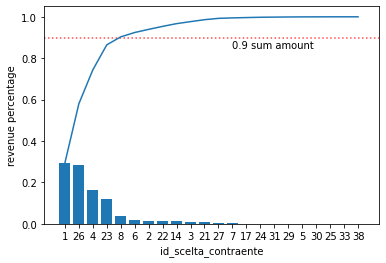

In [23]:
fig, ax = plt.subplots()
abc_scelta_contraente = utils.plot_abc_items(df, "id_scelta_contraente", ax, .9)

In [24]:
scelta_contraente_mask = (df.id_scelta_contraente == 1) | (df.id_scelta_contraente == 26) | (df.id_scelta_contraente == 4) | (df.id_scelta_contraente == 23)
df = df[scelta_contraente_mask]

In [25]:
df.shape

(652740, 23)

# common procurement vocabulary

category within 0.64 - ROW COUNT
cpv
33    80664
45    26369
85     7128
79    14898
dtype: int64


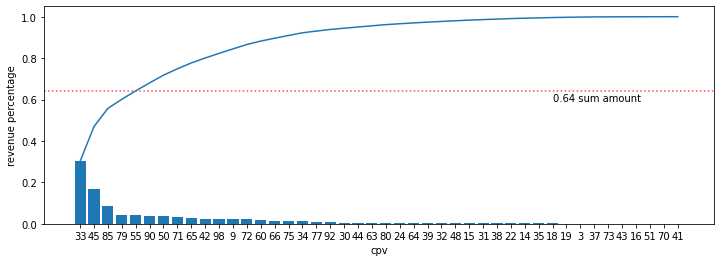

In [45]:
fig, ax = plt.subplots(figsize=(6*2, 4))
abc_cpv = utils.plot_abc_items(df, "cpv", ax, .64)

# time series

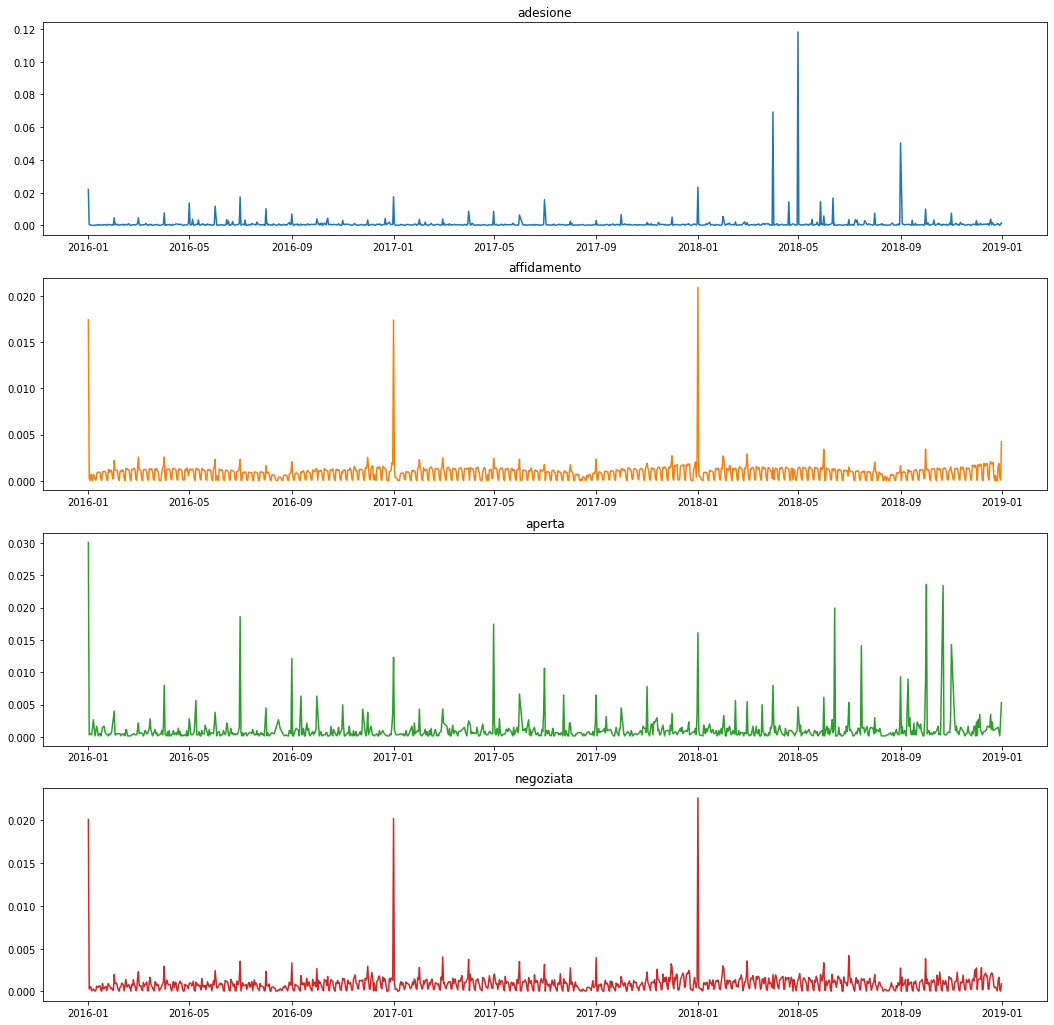

In [39]:
import numpy as np
n = len(abc_scelta_contraente)
fig, ax = plt.subplots(n, figsize=(6*3, 4.5*n))
i = 0
for name, group in df.groupby("tipo_procedura"):
    aggr = group.groupby("data_inizio").size()
    ax[i].plot(aggr / aggr.sum() , label=name, c=list(mcolors.TABLEAU_COLORS)[i])
    ax[i].set_title(name)
    i += 1
plt.show()